In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
train=pd.read_csv('Data file.csv')
#https://www.kaggle.com/surya635/house-price-prediction/execution

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape of train data
train.shape

(1460, 81)

In [5]:
#you can also check the data set information using the info() command. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

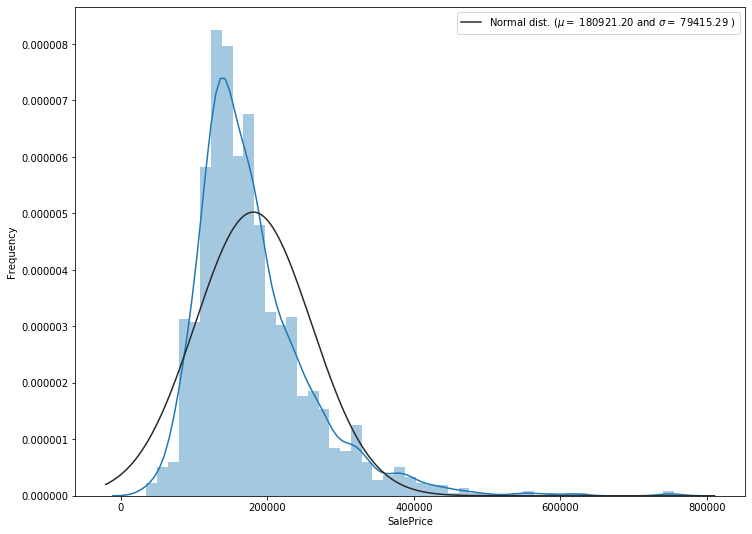

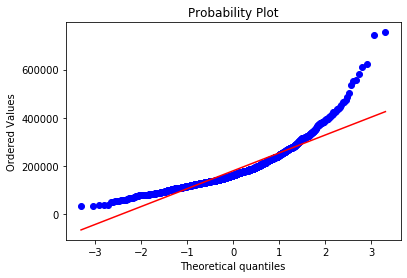

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [7]:
#This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution

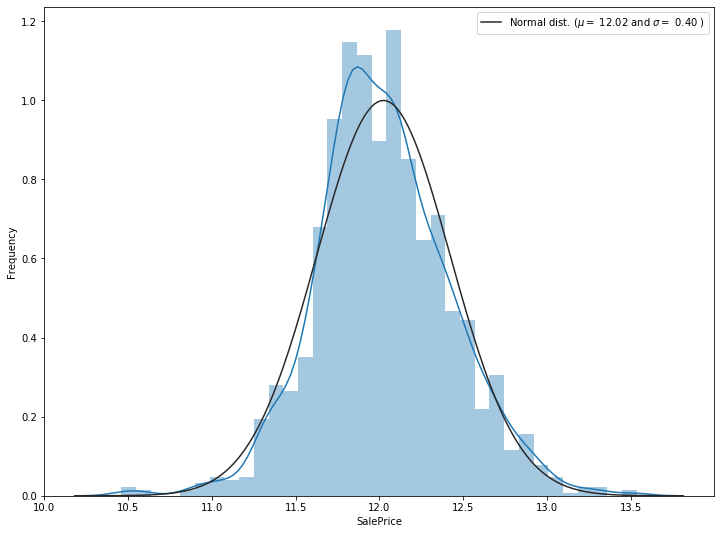

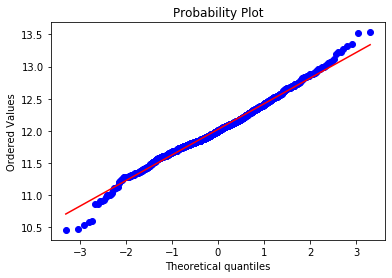

In [8]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [9]:
# checking  missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

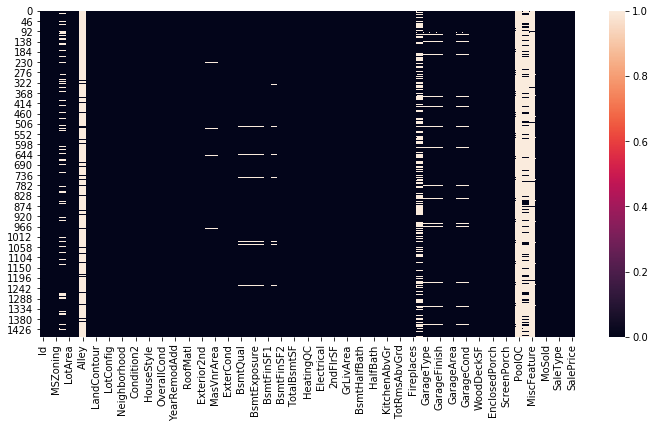

In [10]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [11]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [13]:
Isnull.columns = ['count']

In [14]:
Isnull.index.names = ['Name']

In [15]:
Isnull['Name'] = Isnull.index

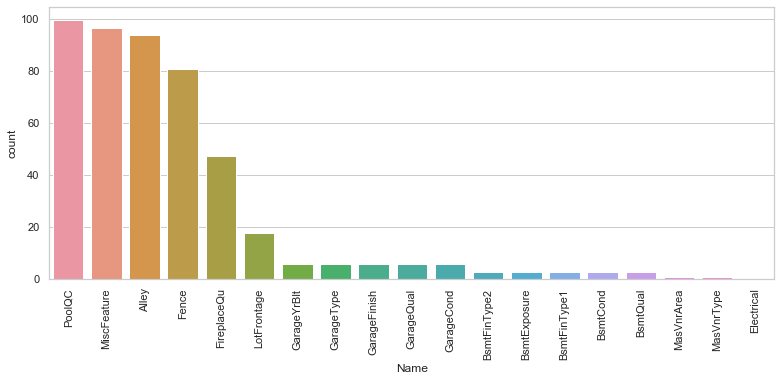

In [16]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [17]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])

In [18]:
train_corr.shape

(1460, 38)

In [19]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

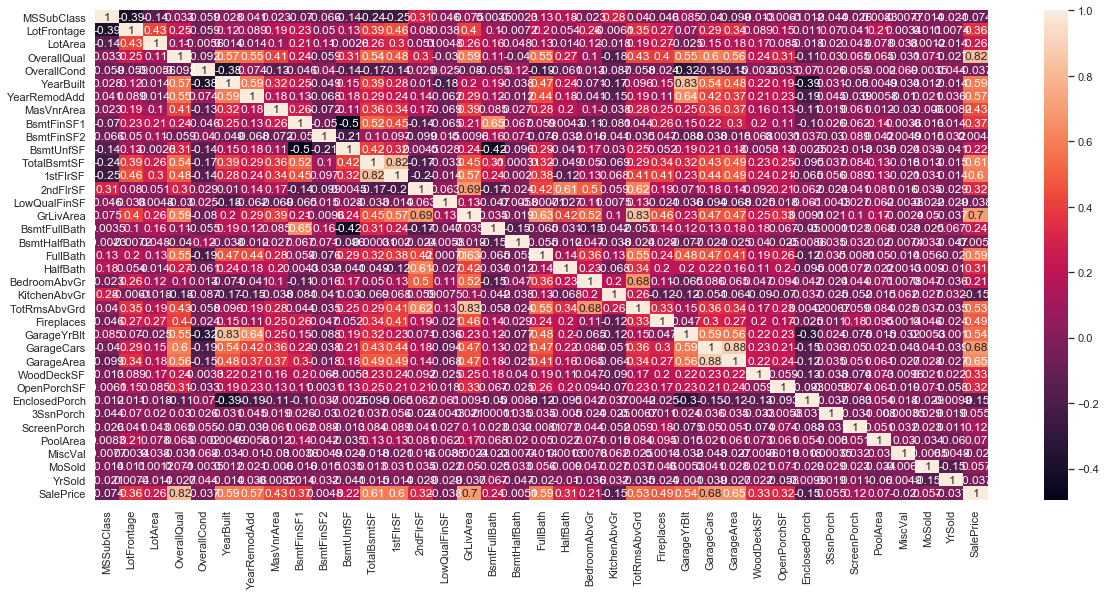

In [20]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

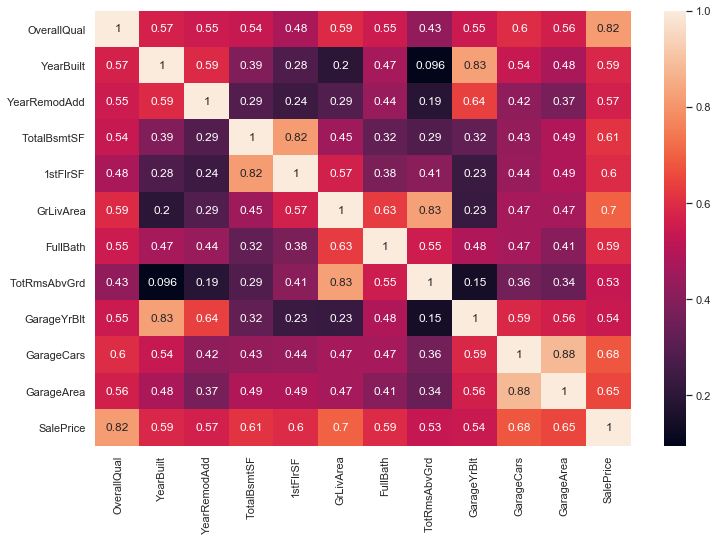

In [21]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [22]:
#Here OverallQual is highly correlated with target feature of saleprice by 82%

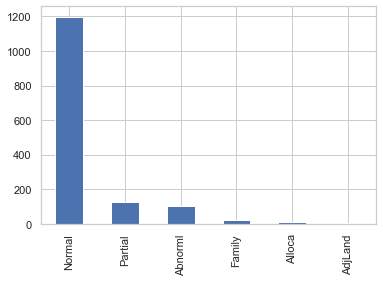

In [23]:
train['SaleCondition'].value_counts().plot(kind='bar')

In [24]:
def column_search(column):
    sns.scatterplot(x='SalePrice', y=column, data=train)

In [25]:
train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

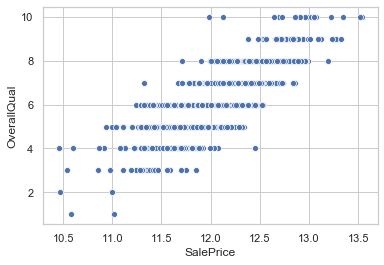

In [26]:
column_search('OverallQual')

From this we can confirm that the higher the overall quality of the house, most often, the higher the sale price of the house.The two points furthest to the left for OverallQual of 10 it may be an outlier. 

In [27]:
train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

the numbers show the amount of square feet for each house. We can see that the smallest house size was 334 square feet and the largest was 5642 square feet. 

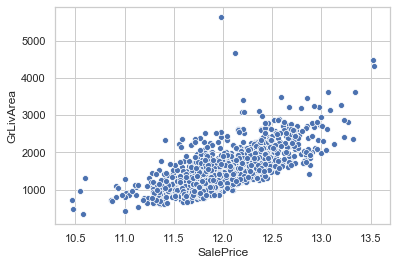

In [28]:
column_search('GrLivArea')

After looking at this graph there is a very intriguing thing . there are two points that have the two highest living area and very low prices given the trend. We will see if these points match with the points from the overall quality points. If they do it will either make our model hard to make or we will need to take these points out because they will be massive outliers.

In [29]:
train.YrSold.describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [30]:
train.GarageCars.describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

When looking at the GarageCars variable we can see that the observations lie in line with how many garage cars spaces are available in our dataset homes. The mean is about 2 cars in each home.

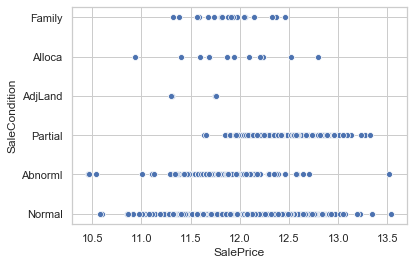

In [31]:
sns.scatterplot(x='SalePrice', y='SaleCondition', data=train)

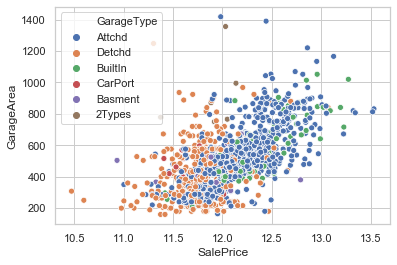

In [32]:
sns.scatterplot(x='SalePrice', y='GarageArea', hue='GarageType', data=train)

We can see that attached and builtin garages are more expensive than detached cars. We can see that there are two attached garages with the highest garagearea that are between 150,000 and 250,000 dollars which is not constant with the rest of the points in the category. We also have a detached garage that is over 1200 square feet, but less than 100,000. Lets look again at our outlier point and see what the garage situation looks like.

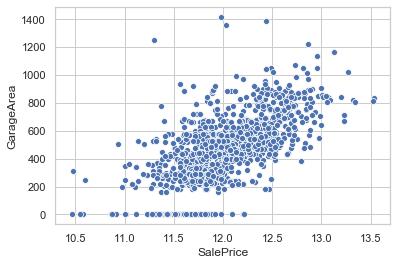

In [33]:
column_search('GarageArea')

We can again see that generally the bigger the garage the more it sells for, but this is not always the case

In [34]:
train.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [35]:
#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

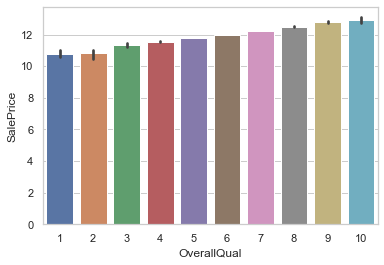

In [36]:
sns.barplot(train.OverallQual, train.SalePrice)

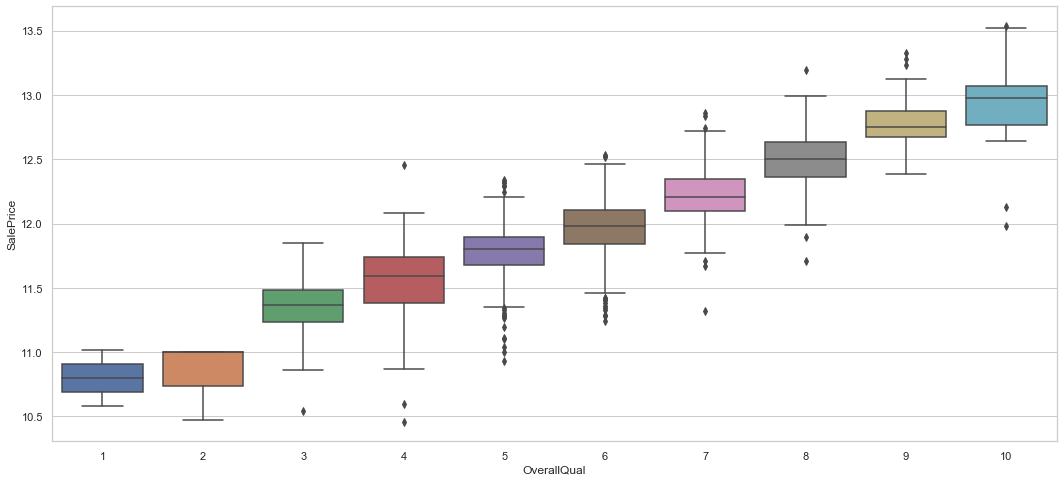

In [37]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


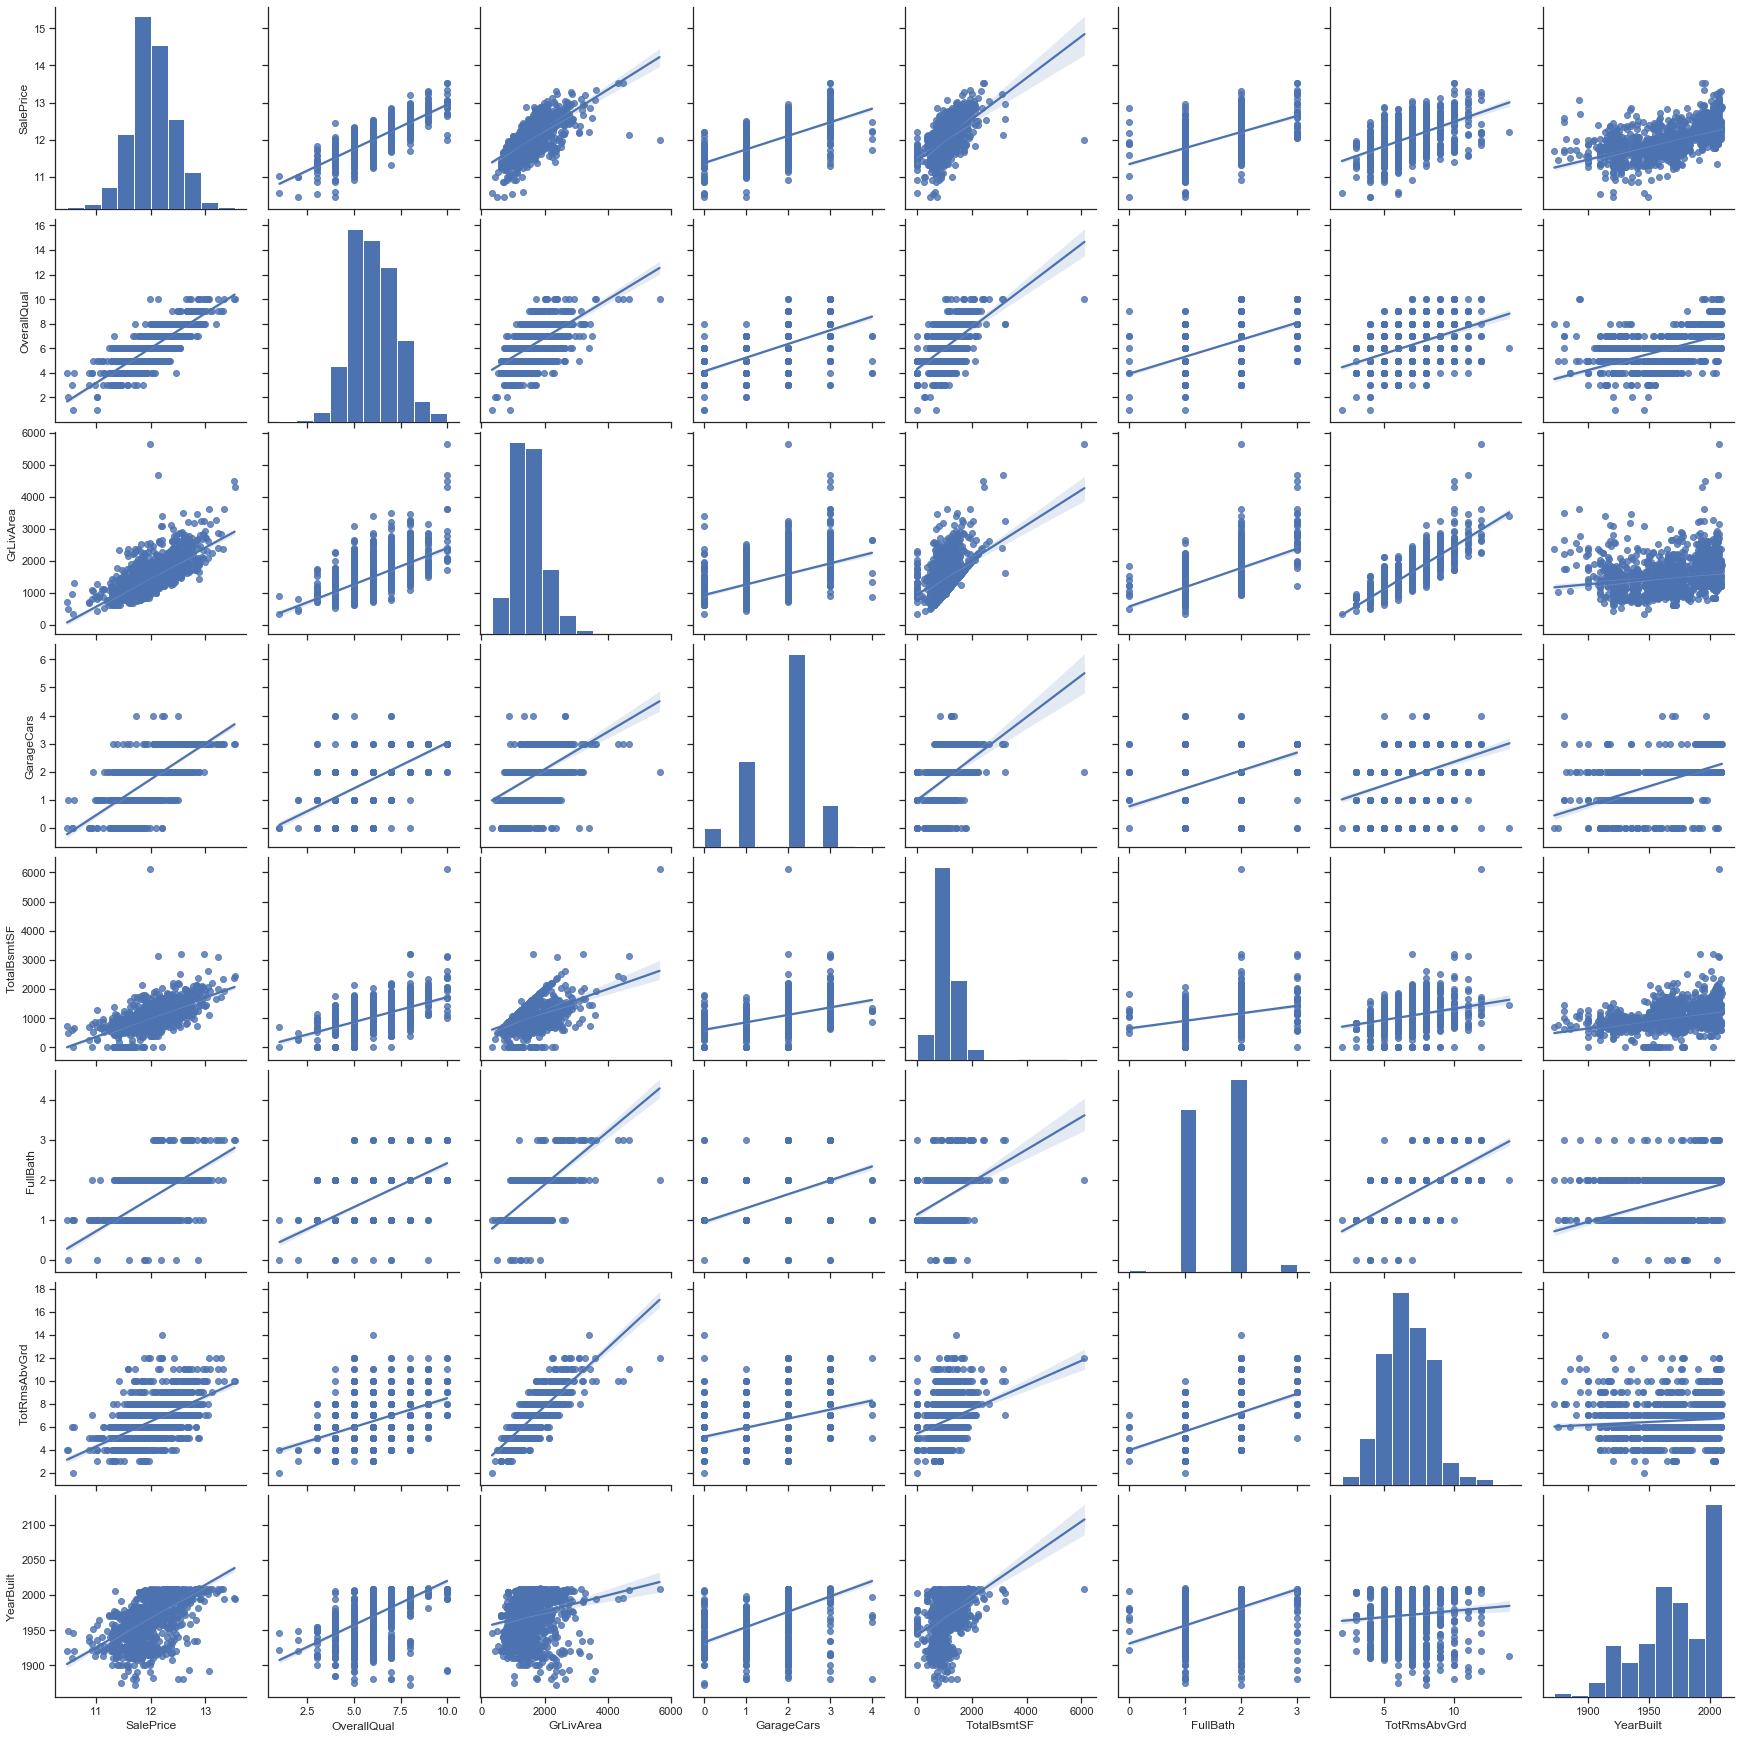

In [38]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [39]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [40]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [41]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [42]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [43]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [44]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [45]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [46]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [47]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [48]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [49]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

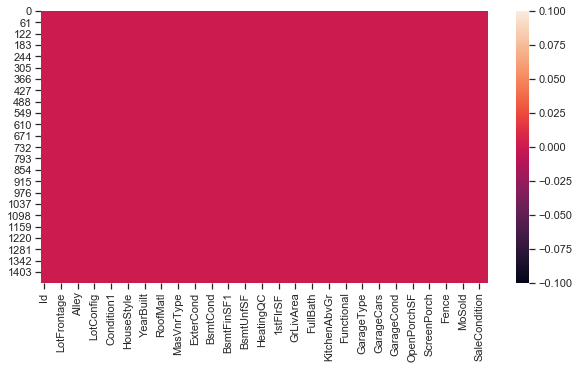

In [50]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

In [51]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [52]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [53]:
#Take targate variable into y
y = train['SalePrice']

In [54]:
#Delete the saleprice
del train['SalePrice']

In [55]:
#Take their values in X and y
X = train.values
y = y.values

In [56]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [57]:
X_train.shape

(1168, 79)

In [58]:
y_train.shape

(1168,)

In [59]:
X_test.shape

(292, 79)

In [60]:
y_test.shape

(292,)

In [61]:
#Train the model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.62221633]
Real value 11.767187766223199


In [62]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.26708677161673


In [63]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
#Fit
model.fit(X_train, y_train)
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.50756697054788


In [64]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(X_train, y_train)
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.76179546558689


In [65]:
from sklearn.linear_model import Lasso,Ridge

In [66]:
ls=Lasso(alpha=0.01)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)

0.8575316934169622

In [67]:
ls.coef_

array([ 5.28187335e-07, -5.55261234e-03, -0.00000000e+00, -6.27503659e-05,
        2.13660779e-06,  0.00000000e+00,  0.00000000e+00, -3.93897868e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.19777917e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        7.30772481e-02,  3.20550836e-02,  2.81251335e-03,  1.57940156e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.23349523e-04,
        0.00000000e+00,  5.75745037e-06, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.72530041e-03,  0.00000000e+00, -5.59959380e-03,
       -7.12193000e-03,  5.43033342e-05,  0.00000000e+00,  7.58284039e-05,
        3.06507921e-05,  2.24867726e-05, -0.00000000e+00, -7.28258442e-03,
        0.00000000e+00,  0.00000000e+00,  2.29294074e-04,  2.30215424e-04,
        1.74700547e-04,  3.07200933e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -6.03208436e-04,  

In [68]:
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_train,y_train)

0.8823303048464654

In [69]:
rd.coef_

array([-5.42371696e-06,  5.17004325e-04, -1.17867225e-02, -4.75480638e-04,
        1.86073981e-06,  1.55090895e-01,  1.67455159e-02, -6.62347477e-03,
        1.15575884e-02, -2.33251314e-03,  2.53725082e-02,  1.20342232e-03,
       -9.76751281e-04, -7.32306425e-02, -2.40938607e-02, -5.65046846e-03,
        6.66852378e-02,  4.04605028e-02,  1.66929633e-03,  5.45279255e-04,
        6.22385400e-03,  1.94633015e-02, -4.17295679e-03,  4.18068903e-03,
        3.86872240e-03,  4.13266197e-05, -1.08669441e-02,  8.05154537e-03,
        1.16007733e-02, -1.11746514e-02,  4.26952287e-03, -9.87320131e-03,
       -6.83859417e-03, -1.55510638e-05,  7.79334187e-03,  7.04285607e-05,
       -6.00619214e-06,  4.88733567e-05, -1.07276305e-02, -8.00551667e-03,
        8.41727405e-02,  0.00000000e+00,  7.52390819e-05,  3.45961960e-05,
        7.99517281e-06,  1.17839108e-04,  5.13859040e-02,  2.11323979e-02,
        4.14430229e-02,  2.37221143e-02,  9.33776495e-03, -2.63056601e-02,
       -1.98493710e-02,  

In [70]:
from sklearn.linear_model import ElasticNet 
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(X_train,y_train)
enrpred=enr.predict(X_test)
print(enr.score(X_train,y_train))
enr.coef_

0.7818976860065255


array([-3.58497648e-06, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.49345216e-06,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.67690392e-03,  2.68496124e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.28412301e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.20774211e-05,  0.00000000e+00,  1.56399671e-05,
       -0.00000000e+00,  1.47769597e-04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.65766829e-05,
       -0.00000000e+00,  3.03386801e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [71]:
from sklearn.externals import joblib
#save the model as a pickel in a file
joblib.dump(GBR,'Housing Use Case.pkl')

C:\Users\Ruchi\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Housing Use Case.pkl']